## Gradient Descent and its variants 

In [25]:
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib as plt

In [2]:
x1=np.random.randint(1,30,200000)
x2=np.random.randint(1,30,200000)

y=4+2*x1+3*x2+3*np.random.random(200000)

In [3]:
w=np.random.random(3)

In [13]:
w

array([0.44033191, 0.27227955, 0.4562897 ])

In [4]:
x=pd.DataFrame({'const':np.ones(200000),'x1':x1,'x2':x2})

## Estimated paramter values from sklearn

In [5]:
lr=LinearRegression()
lr.fit(x.iloc[:,1:],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
w_sklearn=[lr.intercept_]+list(lr.coef_)
w_sklearn

[5.5025253419445335, 2.0002319735597878, 2.999530210935786]

## Paramter Estimation with Gradient Descent

In [7]:
def mypred(features,weights):
    preds=np.dot(features,weights)
    return(preds)

In [8]:
mypred(x,w).shape

(200000,)

In [9]:
def myerror(target,features,weights):
    preds=mypred(features,weights)
    errors=target-preds
    return(errors)

In [10]:
myerror(y,x,w)

array([ 51.9109699 ,  81.46823556, 118.58811877, ...,  80.5523262 ,
        38.74502148,  85.74556593])

In [11]:
def mycost(target,features,weights):
    errors=myerror(target,features,weights)
    cost=np.dot(errors.T,errors)
    return(cost)

In [12]:
mycost(y,x,w)

1090139612.7407212

In [17]:
def gradient(target,features,weights):
    errors=myerror(target,features,weights)
    grad=-np.dot(features.T,errors)/features.shape[0]
    return(grad)

In [18]:
gradient(y,x,w)

array([  -69.20620991, -1159.55237116, -1217.32921757])

In [19]:
def my_lr_gd(target,features,learning_rate,num_steps):
    weights=np.random.random(features.shape[1])
    cost=[]
    for i in range(num_steps):
        weights-=learning_rate*gradient(target,features,weights)
        cost.append(mycost(target,features,weights))
    return(cost,weights)

In [20]:
cost_gd,w_gd=my_lr_gd(y,x,.001,1000)

In [21]:
w_gd

array([1.3833459 , 2.11904051, 3.11830204])

In [22]:
w_sklearn/w_gd #if values are close to 1, then our estimation is correct

array([3.97769302, 0.94393286, 0.96191138])

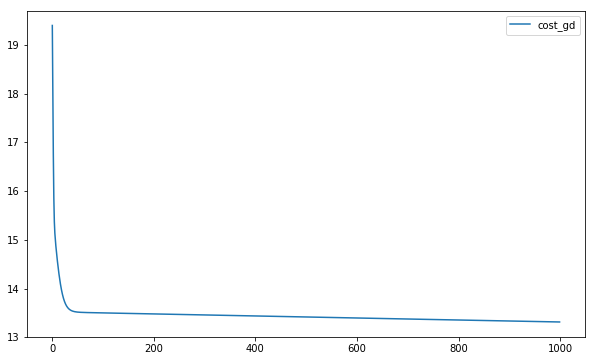

In [30]:
np.log(pd.DataFrame({'cost_gd':cost_gd})).plot(figsize=(10, 8))

## Stochastic Gradient Descent 

In [31]:
def my_lr_sgd(target,features,learning_rate,num_steps):
    cost=[]
    weights=np.random.random(features.shape[1])
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        weights -= learning_rate*gradient(target_sub,features_sub,weights)
        
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [32]:
cost_sgd,w_sgd=my_lr_sgd(y,x,.001,1000)

In [33]:
w_sgd

array([0.87394535, 2.10714344, 3.12089726])

In [34]:
w_sklearn/w_sgd

array([6.29618925, 0.94926237, 0.96111149])

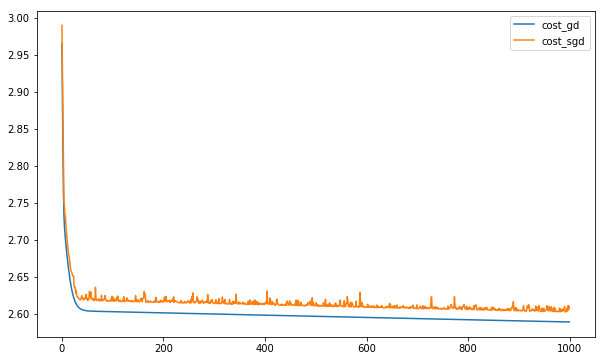

In [35]:
np.log(pd.DataFrame({'cost_gd':np.log(cost_gd),'cost_sgd':np.log(cost_sgd)})).plot(figsize=(10, 8))

## Gradient Descent with momentum 

In [36]:
def my_lr_mom(target,features,learning_rate,num_steps):
    cost=[]
    
    weights=np.random.random(features.shape[1])
    
    vw=np.zeros(features.shape[1])
    beta=0.9
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        vw=beta*vw+(1-beta)*gradient(target_sub,features_sub,weights) #weighted gradient
        
        vw_a=vw/(1-beta**(i+1))
        
        weights -= learning_rate*vw_a
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [37]:
cost_mom,w_mom=my_lr_mom(y,x,.01,1000) #here we can use large learning rate

In [38]:
w_mom

array([3.90265168, 2.03037893, 3.10986443])

In [39]:
w_sklearn/w_mom

array([1.40994529, 0.98515205, 0.96452121])

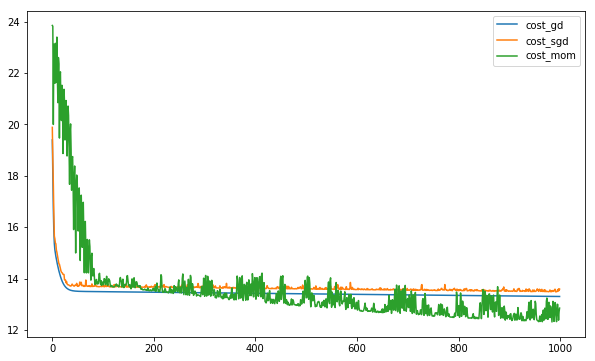

In [41]:
np.log(pd.DataFrame({'cost_gd':cost_gd,'cost_sgd':cost_sgd,'cost_mom':cost_mom})).plot(figsize=(10, 8))

## RMSProp 

In [42]:
def my_lr_rms(target,features,learning_rate,num_steps):
    cost=[]
    
    weights=np.random.random(features.shape[1])
    
    sw=np.zeros(features.shape[1])
    
    beta=0.99
    
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        gd=gradient(target_sub,features_sub,weights)
        sw=beta*sw+(1-beta)*(gd**2)
        
        sw_a=sw/(1-beta**(i+1)) #gradient correction
        
        weights -= learning_rate*(gd/(np.sqrt(sw_a)+1e-15))
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [43]:
cost_rms,w_rms=my_lr_rms(y,x,.1,1000)

In [44]:
w_rms

array([5.42944816, 1.9852186 , 3.0108811 ])

In [45]:
w_sklearn/w_rms

array([1.01345941, 1.00756258, 0.99623004])

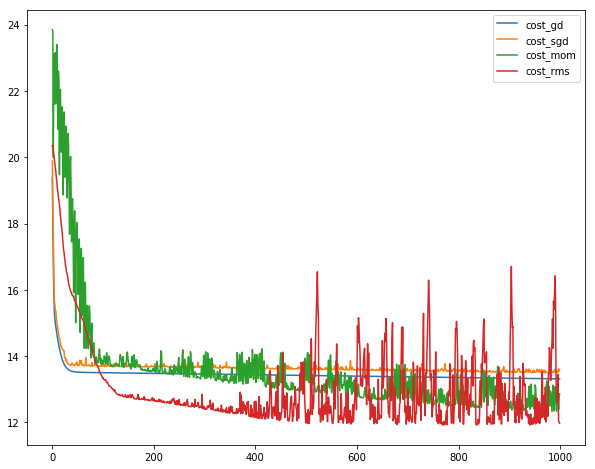

In [47]:
np.log(pd.DataFrame({'cost_gd':cost_gd,'cost_sgd':cost_sgd,'cost_mom':cost_mom,'cost_rms':cost_rms})).plot(figsize=(10, 8))

## ADAM (Adaptive Moment Estimation) 

In [48]:
def my_lr_adam(target,features,learning_rate,num_steps):
    cost=[]
    
    weights=np.random.random(features.shape[1])
    sw=np.zeros(features.shape[1])
    vw=np.zeros(features.shape[1])
    beta1=0.9
    beta2=0.99
    
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        gd=gradient(target_sub,features_sub,weights)
        vw=beta1*vw+(1-beta1)*gd
        sw=beta2*sw+(1-beta2)*(gd**2)
        
        vw_a=vw/(1-beta1**(i+1))
        sw_a=sw/(1-beta2**(i+1))
        
        weights -= learning_rate*(vw_a/(np.sqrt(sw_a)+1e-15))
        
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [49]:
cost_adam,w_adam=my_lr_adam(y,x,.1,1000)

In [50]:
w_adam

array([5.54107835, 2.02909474, 2.98171583])

In [51]:
w_sklearn/w_adam

array([0.99304233, 0.98577554, 1.00597454])

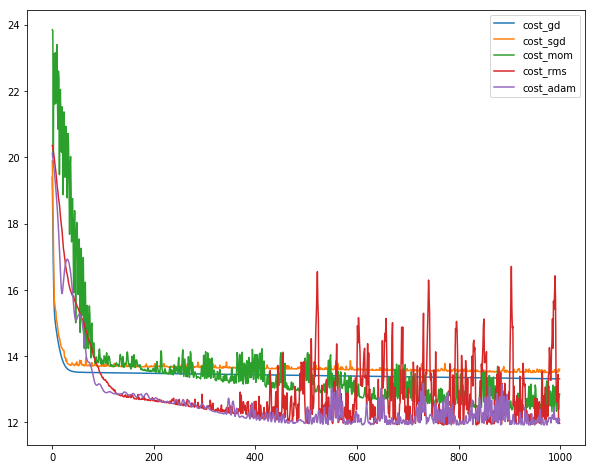

In [52]:
np.log(pd.DataFrame({'cost_gd':cost_gd,'cost_sgd':cost_sgd,'cost_mom':cost_mom,'cost_rms':cost_rms,'cost_adam':cost_adam})).plot(figsize=(10, 8))